In [ ]:
!pip install tensorflow==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 21 kB/s 
     |████████████████████████████████| 2.9 MB 74.1 MB/s 
     |████████████████████████████████| 459 kB 88.5 MB/s 
     |████████████████████████████████| 20.1 MB 640 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall

In [ ]:
print(tf.version.VERSION)

2.3.1


In [ ]:
import os
import h5py
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tensorflow import keras 
import tensorflow as tf
import tensorflow.keras.backend as k
from tensorflow import keras
print(tf.version.VERSION)
from tensorflow.keras.utils import HDF5Matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adadelta
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import Dense, Activation, Dropout, Bidirectional, LSTM, GRU, Flatten, Embedding, concatenate, Conv1D, Input, Embedding, MaxPooling1D

metric_files = ["model_metric_1.csv", "model_metric_2_whole.csv", "model_metric_3_whole.csv"]


2.3.1


In [ ]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
config = tf.compat.v1.ConfigProto(gpu_options = gpu_options)
config.gpu_options.allow_growth=True
session = tf.compat.v1.Session( config = config)
k.clear_session()

In [ ]:
DATA = "/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Data"
COCO = "/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Data/coco"
DATA_INTERMEDIATE = "/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Data Files"
PROCESSED_TRAINING_DATA = "/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
h5_img = h5py.File(os.path.join(PROCESSED_TRAINING_DATA, 'full_img_features_train.h5'), 'r')
img_features_train = h5_img['full_img_features_train'][:]

h5_img = h5py.File(os.path.join(PROCESSED_TRAINING_DATA,'full_img_features_val.h5'), 'r')
img_features_val = h5_img['full_img_features_val'][:]

h5_ans = h5py.File(os.path.join(PROCESSED_TRAINING_DATA,'full_answers_train.h5'), 'r')
answer_train = h5_ans['full_answers_train'][:]
h5_ans.close()

h5_ans = h5py.File(os.path.join(PROCESSED_TRAINING_DATA,'full_answers_val.h5'), 'r')
answer_val   = h5_ans['full_answers_val'][:]
h5_ans.close()

h5_que = h5py.File(os.path.join(PROCESSED_TRAINING_DATA,'full_question_train_tokenize.h5'), 'r')
question_train = h5_que['full_question_train_tokenize'][:]

h5_que = h5py.File(os.path.join(PROCESSED_TRAINING_DATA,'full_question_val_tokenize.h5'), 'r')
question_val = h5_que['full_question_val_tokenize'][:]

h5_que = h5py.File(os.path.join(PROCESSED_TRAINING_DATA,'embedding_matrix_tokenize.h5'), 'r')
embedding_matrix = h5_que['embedding_matrix_tokenize'][:]

In [ ]:
h5_que = h5py.File(os.path.join(PROCESSED_TRAINING_DATA,'embedding_matrix_tokenize.h5'), 'r')
embedding_matrix = h5_que['embedding_matrix_tokenize'][:]

NAME = "1_model_one_lstm_vgg"

val_loss = []
val_acc = []
loss = []
acc = []

dropout_rate = 0.5
print ("Creating text model...")
question_input = Input(shape=(25, ))

x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], weights = [embedding_matrix], input_length=25, trainable = False)(question_input)
lstm_1 = LSTM(units=512, return_sequences=False)(x)
dropout__ques_1 = Dropout(dropout_rate)(lstm_1)

dense_ques_1 = Dense(1024, activation='tanh')(dropout__ques_1)
print ("Creating image model...")

image_input = Input(shape=(4096, ) )
dense_img_1 = Dense(1024,  activation='relu')(image_input)

print ("Merging final model...")

concatenate_1 = concatenate([dense_img_1, dense_ques_1])

dropout_1 = Dropout(0.5)(concatenate_1)
dense_1 = Dense(1001, activation = "tanh")(dropout_1)
dropout_2 = Dropout(0.5)(dense_1)    
dense_2 = Dense(1001, activation = "softmax")(dropout_2)

model_1 = Model(inputs=[image_input, question_input], outputs=dense_2)
opt = SGD(lr = 0.01)
model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model_1.summary() 


Creating text model...
Creating image model...
Merging final model...
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 25, 300)      4833600     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 512)          1665024     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 4096)]       0                                            
_________________

In [ ]:
# using keras tokenizer
nb_epoch = 50
batch_size = 99

h5_img = h5py.File(os.path.join(PROCESSED_TRAINING_DATA, 'full_img_features_train.h5'), 'r')
img_features_train = h5_img['full_img_features_train'][:]

h5_ans = h5py.File(os.path.join(PROCESSED_TRAINING_DATA,'full_answers_train.h5'), 'r')
answer_train = h5_ans['full_answers_train'][:]

h5_que = h5py.File(os.path.join(PROCESSED_TRAINING_DATA,'full_question_train_tokenize.h5'), 'r')
question_train = h5_que['full_question_train_tokenize'][:]

print("read the data")

print("epoch started!")
for e in range(nb_epoch):
  epoch_loss = []
  epoch_acc = []
  
  print("Epoch {}/{}".format((e+1), nb_epoch))
  nb_batch = 248349//batch_size
      
  for idy in range(nb_batch):
    start = idy * batch_size
    if idy == nb_batch - 1:
      end = 248349
    else:
      end = start + batch_size
  
    start_feat = start // 3
    end_feat = end // 3
    X_img = img_features_train[start_feat:end_feat,:]
    X_img = np.repeat(X_img, 3, 0)
    X_que = question_train[start:end,:]
    y     = answer_train[start:end,:]
    loss, acc = model_1.train_on_batch([X_img, X_que], y)
    
    epoch_loss.append(loss)
    epoch_acc.append(acc)
    
  print("cost: %f, acc: %f" % (loss, acc))
  print("cost average: %f, acc average: %f" % (np.mean(epoch_loss), np.mean(epoch_acc)))

model_1.save('model_prime_1.h5')

read the data
epoch started!
Epoch 1/50
cost: 0.478375, acc: 0.820513
cost average: 0.570046, acc average: 0.786833
Epoch 2/50
cost: 0.475293, acc: 0.846154
cost average: 0.562137, acc average: 0.790423
Epoch 3/50
cost: 0.562677, acc: 0.750000
cost average: 0.557191, acc average: 0.791819
Epoch 4/50
cost: 0.459964, acc: 0.826923
cost average: 0.553454, acc average: 0.793319
Epoch 5/50
cost: 0.470241, acc: 0.833333
cost average: 0.550351, acc average: 0.793616
Epoch 6/50
cost: 0.509450, acc: 0.769231
cost average: 0.547075, acc average: 0.794988
Epoch 7/50
cost: 0.530540, acc: 0.788462
cost average: 0.544825, acc average: 0.795837
Epoch 8/50
cost: 0.553041, acc: 0.814103
cost average: 0.541491, acc average: 0.796552
Epoch 9/50
cost: 0.558970, acc: 0.794872
cost average: 0.540215, acc average: 0.797076
Epoch 10/50
cost: 0.580213, acc: 0.743590
cost average: 0.537927, acc average: 0.797708
Epoch 11/50
cost: 0.478253, acc: 0.801282
cost average: 0.534187, acc average: 0.799761
Epoch 12/50


In [ ]:
def generator(answer, img, question, batch_size, types):
    
    if types == 'train':
      x_img =      HDF5Matrix(img, 'image_train')
      x_question = HDF5Matrix(question, 'full_question_train_tokenize')
      y =      HDF5Matrix(answer, 'full_answers_train')
      size = x_question.end
      #X_img = np.repeat(x_img, 3, 0)
    elif types == 'test':
      x_img =      HDF5Matrix(img, 'image_val')
      x_question = HDF5Matrix(question, 'full_question_val_tokenize')
      y = HDF5Matrix(answer, 'full_answers_val')
      size = x_question.end
      #X_img = np.repeat(x_img, 3, 0)
    idx = 0
    while True:
      
        last_batch = idx + batch_size > size
        end = idx + batch_size if not last_batch else size
        
        yield [x_img[idx:end], x_question[idx:end]], y[idx:end]
        idx = end if not last_batch else 0

In [ ]:
def data_statistic(train_dataset, test_dataset):
    train_x = HDF5Matrix(train_dataset, 'full_answers_train')
    test_x = HDF5Matrix(test_dataset, 'full_answers_val')
    return train_x.end, test_x.end

In [ ]:
if __name__ == '__main__':
    batch_size = 64
    answer_train = '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data/full_answers_train.h5'
    answer_test =  '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data/full_answers_val.h5'
    
    img_train = '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/image_train.h5'
    img_test =   '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/image_val.h5'
    
    question_train = '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data/full_question_train_tokenize.h5'
    question_test =  '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data/full_question_val_tokenize.h5'

    train_generator = generator(answer_train, img_train, question_train, batch_size, types = 'train')
    test_generator =  generator(answer_test,  img_test,  question_test,  batch_size, types = 'test')
    
    nb_train_samples, nb_test_samples = data_statistic(answer_train, answer_test)
    print('train samples: %d, test samples: %d' % (nb_train_samples, nb_test_samples))

    history = model_1.fit_generator(
        epochs=100,
        generator=train_generator, steps_per_epoch=nb_train_samples // batch_size,
        validation_data=test_generator, validation_steps=nb_test_samples // batch_size,
        max_queue_size=10,  # use a value which can fit batch_size * image_size * max_queue_size in your CPU memory
        workers=1,  # I don't see multi workers can have any performance benefit without multi threading
        use_multiprocessing=False,  # HDF5Matrix cannot support multi-threads
        shuffle=False)  # you cannot shuffle on a HDF5Matrix, so make sure you shuffle the data before save to h5 file
    
    val_loss = []
    val_acc = []
    loss = []
    acc = []

    val_loss = history.history["val_loss"]
    val_acc  = history.history["val_accuracy"]
    loss     = history.history["loss"]
    acc      = history.history["accuracy"]

    models = ["1_model_one_lstm_vgg" for i in range(100) ]
    model_metric_1 =pd.DataFrame(np.column_stack([models, acc, loss, val_acc, val_loss]), 
            columns = ["models", "accuracy", "loss", "validation_accuracy", "validation_loss"])

    model_metric_1.to_csv("model_metric_1.csv")

train samples: 248349, test samples: 121512
Epoch 1/100
3880/3880 [==============================] - 81s 21ms/step - loss: 1.8354 - accuracy: 0.3751 - val_loss: 1.8252 - val_accuracy: 0.3847
Epoch 2/100
3880/3880 [==============================] - 80s 21ms/step - loss: 1.7992 - accuracy: 0.3815 - val_loss: 1.7911 - val_accuracy: 0.3892
Epoch 3/100
3880/3880 [==============================] - 89s 23ms/step - loss: 1.7680 - accuracy: 0.3892 - val_loss: 1.7767 - val_accuracy: 0.3922
Epoch 4/100
3880/3880 [==============================] - 147s 38ms/step - loss: 1.7424 - accuracy: 0.3967 - val_loss: 1.7582 - val_accuracy: 0.3977
Epoch 5/100
3880/3880 [==============================] - 146s 38ms/step - loss: 1.7185 - accuracy: 0.4035 - val_loss: 1.7460 - val_accuracy: 0.4016
Epoch 6/100
3880/3880 [==============================] - 146s 38ms/step - loss: 1.6971 - accuracy: 0.4119 - val_loss: 1.7267 - val_accuracy: 0.4073
Epoch 7/100
3880/3880 [==============================] - 147s 38ms/step

ValueError: ignored

In [ ]:
    models = ["1_model_one_lstm_vgg" for i in range(100) ]
    model_metric_1 =pd.DataFrame(np.column_stack([models, acc, loss, val_acc, val_loss]), 
            columns = ["models", "accuracy", "loss", "validation_accuracy", "validation_loss"])

    model_metric_1.to_csv("model_metric_1.csv")

In [ ]:
model_1.save("model_1.h5")

In [ ]:
# 1 gru


dropout_rate = 0.5
print ("Creating text model...")
question_input = Input(shape=(25, ))

x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], weights = [embedding_matrix], input_length=25, trainable = False)(question_input)
lstm_1 = GRU(units=512, return_sequences=False)(x)
dropout__ques_1 = Dropout(dropout_rate)(lstm_1)

dense_ques_1 = Dense(1024, activation='tanh')(dropout__ques_1)
print ("Creating image model...")

image_input = Input(shape=(4096, ) )
dense_img_1 = Dense(1024,  activation='relu')(image_input)

print ("Merging final model...")

concatenate_1 = concatenate([dense_img_1, dense_ques_1])

dropout_1 = Dropout(0.5)(concatenate_1)
dense_1 = Dense(1001, activation = "tanh")(dropout_1)
dropout_2 = Dropout(0.5)(dense_1)    
dense_2 = Dense(1001, activation = "softmax")(dropout_2)

model_2 = Model(inputs=[image_input, question_input], outputs=dense_2)
opt = SGD(lr = 0.01)
model_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_2.summary()


if __name__ == '__main__':
    batch_size = 64
    answer_train = '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data/full_answers_train.h5'
    answer_test =  '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data/full_answers_val.h5'
    
    img_train = '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/image_train.h5'
    img_test =   '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/image_val.h5'
    
    question_train = '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data/full_question_train_tokenize.h5'
    question_test =  '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data/full_question_val_tokenize.h5'

    train_generator = generator(answer_train, img_train, question_train, batch_size, types = 'train')
    test_generator =  generator(answer_test,  img_test,  question_test,  batch_size, types = 'test')
    
    nb_train_samples, nb_test_samples = data_statistic(answer_train, answer_test)
    print('train samples: %d, test samples: %d' % (nb_train_samples, nb_test_samples))

    model_2.fit_generator(
        epochs=100,
        generator=train_generator, steps_per_epoch=nb_train_samples // batch_size,
        validation_data=test_generator, validation_steps=nb_test_samples // batch_size,
        max_queue_size=10,  # use a value which can fit batch_size * image_size * max_queue_size in your CPU memory
        workers=1,  # I don't see multi workers can have any performance benefit without multi threading
        use_multiprocessing=False,  # HDF5Matrix cannot support multi-threads
        shuffle=False)  # you cannot shuffle on a HDF5Matrix, so make sure you shuffle the data before save to h5 file
    val_loss = []
    val_acc = []
    loss = []
    acc = []

    val_loss = history.history["val_loss"]
    val_acc  = history.history["val_accuracy"]
    loss     = history.history["loss"]
    acc      = history.history["accuracy"]

    models = ["2_model_one_gru_vgg" for i in range(100) ]
    model_metric_2 =pd.DataFrame(np.column_stack([models, acc, loss, val_acc, val_loss]), 
            columns = ["models", "accuracy", "loss", "validation_accuracy", "validation_loss"])

    model_metric_2.to_csv("model_metric_2.csv")
model_2.save("model_2.h5")

Creating text model...
Creating image model...
Merging final model...
Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 25, 300)      4833600     input_13[0][0]                   
__________________________________________________________________________________________________
gru_2 (GRU)                     (None, 512)          1250304     embedding_6[0][0]                
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 4096)]       0                                            
________________

In [ ]:
# CNN proposed architecture on textual data.


dropout_rate = 0.5

h5_que = h5py.File(os.path.join(PROCESSED_TRAINING_DATA,'embedding_matrix_tokenize.h5'), 'r')
embedding_matrix = h5_que['embedding_matrix_tokenize'][:]

print ("Creating text model...")

question_input = Input(shape=(25, ))

x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], weights = [embedding_matrix], input_length=25, trainable = False)(question_input)

l_cov1= Conv1D(128, 1, activation='relu')(x)
l_pool1 = MaxPooling1D(1)(l_cov1)

l_cov2 = Conv1D(128, 1, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(1)(l_cov2)

l_cov3 = Conv1D(128, 1, activation='relu')(l_pool2)
l_pool3 = MaxPooling1D(1)(l_cov3)  # global max pooling

l_flat = Flatten()(l_pool3)

l_dense = Dense(128, activation='relu')(l_flat)

dense_ques_1 = Dense(1024, activation='tanh')(l_dense)

print ("Creating image model...")
image_input = Input(shape=(4096, ) )
dense_img_1 = Dense(1024,  activation='relu')(image_input)

print ("Merging final model...")

concatenate_1 = concatenate([dense_img_1, dense_ques_1])

dropout_1 = Dropout(0.5)(concatenate_1)
dense_1 = Dense(1001, activation = "tanh")(dropout_1)
dropout_2 = Dropout(0.5)(dense_1)    
dense_2 = Dense(1001, activation = "softmax")(dropout_2)

model_3 = Model(inputs=[image_input, question_input], outputs=dense_2)
opt = SGD(lr = 0.01)
model_3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_3.summary()

if __name__ == '__main__':
    batch_size = 64
    answer_train = '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data/full_answers_train.h5'
    answer_test =  '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data/full_answers_val.h5'
    
    img_train = '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/image_train.h5'
    img_test =   '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/image_val.h5'
    
    question_train = '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data/full_question_train_tokenize.h5'
    question_test =  '/content/drive/MyDrive/Zayn Nissan Works/Ashfaq/Processed Training Data/full_question_val_tokenize.h5'

    train_generator = generator(answer_train, img_train, question_train, batch_size, types = 'train')
    test_generator =  generator(answer_test,  img_test,  question_test,  batch_size, types = 'test')
    
    nb_train_samples, nb_test_samples = data_statistic(answer_train, answer_test)
    print('train samples: %d, test samples: %d' % (nb_train_samples, nb_test_samples))

    history = model_3.fit_generator(
        epochs=100,
        generator=train_generator, steps_per_epoch=nb_train_samples // batch_size,
        validation_data=test_generator, validation_steps=nb_test_samples // batch_size,
        max_queue_size=10,  # use a value which can fit batch_size * image_size * max_queue_size in your CPU memory
        workers=1,  # I don't see multi workers can have any performance benefit without multi threading
        use_multiprocessing=False,  # HDF5Matrix cannot support multi-threads
        shuffle=False)  # you cannot shuffle on a HDF5Matrix, so make sure you shuffle the data before save to h5 file

    val_loss = []
    val_acc = []
    loss = []
    acc = []

    val_loss = history.history["val_loss"]
    val_acc  = history.history["val_accuracy"]
    loss     = history.history["loss"]
    acc      = history.history["accuracy"]

    models = ["3_model_cnn_vgg" for i in range(100) ]
    model_metric_3 =pd.DataFrame(np.column_stack([models, acc, loss, val_acc, val_loss]), 
            columns = ["models", "accuracy", "loss", "validation_accuracy", "validation_loss"])

    model_metric_3.to_csv("model_metric_3.csv")

model_3.save("model_3.h5")

Creating text model...
Creating image model...
Merging final model...
Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 25, 300)      4833600     input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 25, 128)      38528       embedding_3[0][0]                
__________________________________________________________________________________________________
max_pooling1d_6 (MaxPooling1D)  (None, 25, 128)      0           conv1d_6[0][0]                   
_________________

In [ ]:
h5_que = h5py.File(os.path.join(PROCESSED_TRAINING_DATA,'embedding_matrix_tokenize.h5'), 'r')
embedding_matrix = h5_que['embedding_matrix_tokenize'][:]

NAME = "1_model_onehundred_lstm_vgg"

val_loss = []
val_acc = []
loss = []
acc = []

print ("Creating image model...")
image_input = Input(shape=(4096,16 ) )
dense_img_1 = Dense(1024,  activation='relu')(image_input)

dropout_rate = 0.5
print ("Creating text model...")
question_input = Input(shape=(25, ))
x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], weights = [embedding_matrix], input_length=25, trainable = False)(question_input)
lstm_1 = LSTM(units=512, return_sequences=False)(x)
lstm_1 = LSTM(units=512, return_sequences=False)(dense_img_1)
dropout__ques_1 = Dropout(dropout_rate)(lstm_1)
dense_ques_1 = Dense(1024, activation='tanh')(dropout__ques_1)

print ("Merging final model...")

#concatenate_1 = concatenate([dense_img_1, dense_ques_1])

dropout_1 = Dropout(0.5)(dense_ques_1)
dense_1 = Dense(1001, activation = "tanh")(dropout_1)
dropout_2 = Dropout(0.5)(dense_1)    
dense_2 = Dense(1001, activation = "softmax")(dropout_2)

model_1 = Model(inputs=[image_input, question_input], outputs=dense_2)
opt = SGD(lr = 0.01)
model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model_1.summary() 

Creating image model...
Creating text model...
Merging final model...
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 4096, 16)]   0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 4096, 1024)   17408       input_12[0][0]                   
__________________________________________________________________________________________________
lstm_9 (LSTM)                   (None, 512)          3147776     dense_10[0][0]                   
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 512)          0           lstm_9[0][0]                     
_________________

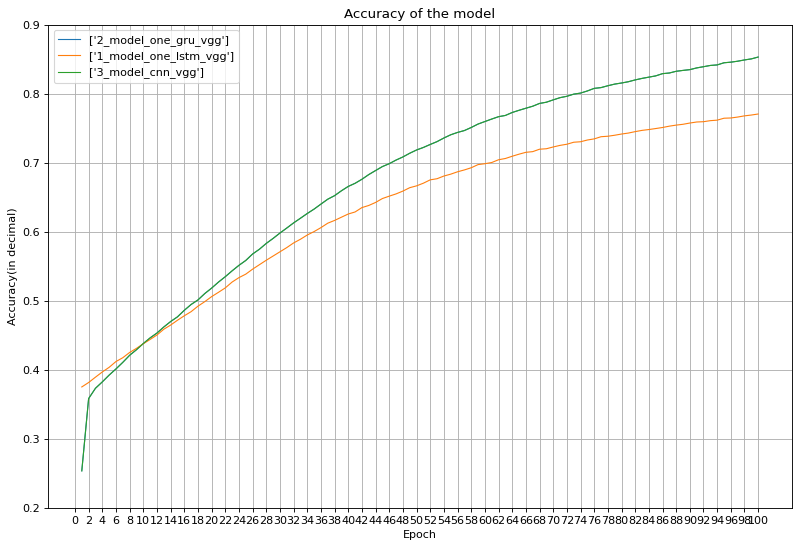

In [ ]:
metric_files = ["model_metric_2.csv", "model_metric_1.csv", "model_metric_3.csv" ]
figure(num=None, figsize=(12, 8), dpi=80)
accuracy = []
name = []
axes= plt.axes()
axes.grid()
axes.set_title('Accuracy of the model')
axes.set_xlabel("Epoch")
axes.set_ylabel("Accuracy(in decimal)")
for i in metric_files:
    metric = pd.read_csv(i)
    accuracy = metric["accuracy"]
    name.append(list(set(metric["models"])) )
    epochs = np.arange(1, 101, 1)
    line1, = plt.plot(epochs, accuracy, linewidth = 1)
    plt.xticks(np.arange(0, 101, 2))
    plt.yticks(np.arange(0.2, 1.0, 0.1))
plt.gca().legend(name)
plt.show()

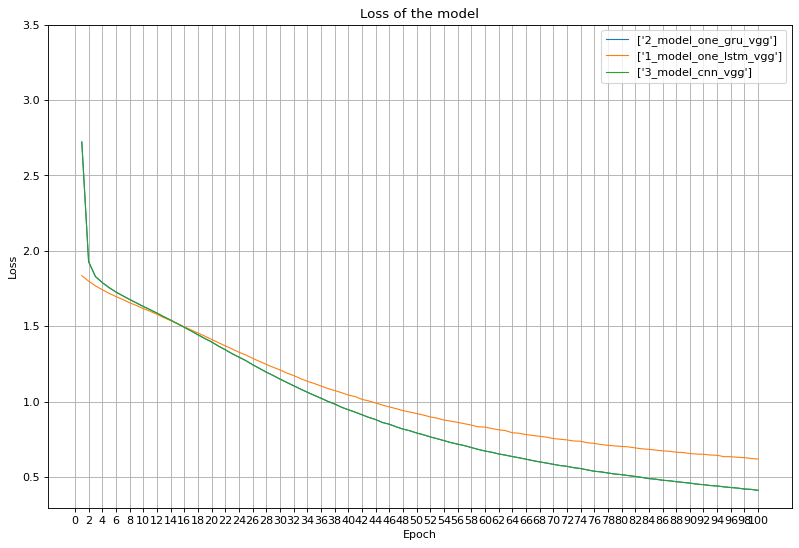

In [ ]:
metric_files = ["model_metric_2.csv", "model_metric_1.csv", "model_metric_3.csv" ]
figure(num=None, figsize=(12, 8), dpi=80)
loss = []
name = []
axes= plt.axes()
axes.grid()
axes.set_title('Loss of the model')
axes.set_xlabel("Epoch")
axes.set_ylabel("Loss")
for i in metric_files:
    metric = pd.read_csv(i)
    accuracy = metric["loss"]
    name.append(list(set(metric["models"])) )
    epochs = np.arange(1, 101, 1)
    line1, = plt.plot(epochs, accuracy, linewidth = 1)
    plt.xticks(np.arange(0, 101, 2))
    plt.yticks(np.arange(0.5, 4, 0.5))
plt.gca().legend(name)
plt.show()

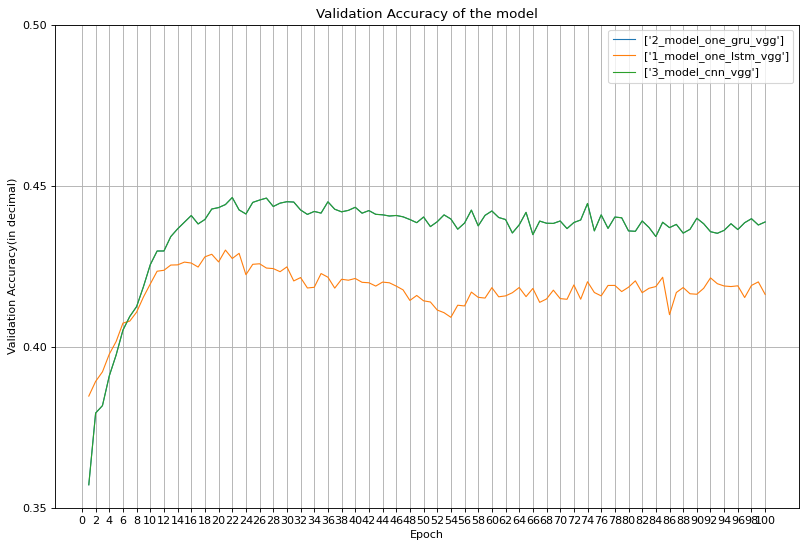

In [ ]:
figure(num=None, figsize=(12, 8), dpi=80)
validation_accuracy = []
name = []
axes= plt.axes()
axes.grid()
axes.set_title('Validation Accuracy of the model')
axes.set_xlabel("Epoch")
axes.set_ylabel("Validation Accuracy(in decimal)")
for i in metric_files:
    metric = pd.read_csv(i)
    accuracy = metric["validation_accuracy"]
    name.append(list(set(metric["models"])) )
    epochs = np.arange(1, 101, 1)
    line1, = plt.plot(epochs, accuracy, linewidth = 1)
    plt.xticks(np.arange(0, 101, 2))
    plt.yticks(np.arange(0.35, 0.5, 0.05))
plt.gca().legend(name)
plt.show()